# **Loading necessery libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading the data set**

In [3]:
data = pd.read_csv('multiple_linear_regression.csv')
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# **Data Preprocessing**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull().sum()     # there's no null , no need of data preprocessing

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [6]:
data.shape

(200, 4)

# **Splitting up the data**

In [11]:
y = data.iloc[:, 3:]
y.head()

,Target
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [7]:
x = data.iloc[:, 0:3]
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 43)

# 0.30 means 30% of the data will be used for testing & 70% of the data will be used for the training purpose

# random state means the distribution of 30% & 70% will be randomly taken rows from the whole dataset every time

# 43 means the shuffling will be happend in a specific order and if someone else enters 43 in the same dataset,
# the random shuffling will be happened same as mine


In [25]:
data.shape

(200, 4)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140, 1)
(60, 1)


# **<font color = 'green'>Linear Regression with multiple inputs</font>**

# **Model Training**

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
lr.coef_  # returns the optimized values of x1, x2, x3

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [30]:
lr.intercept_  # returns the optimized values of b

array([3.0777745])

# Prediction

In [32]:
pred_value = lr.predict(x_test)

# Cost

In [35]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, pred_value)
cost

2.2412862530933473

# Plotting & Visualization

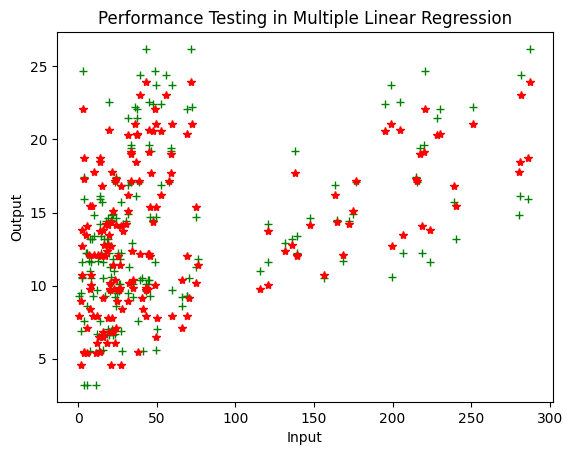

In [40]:
plt.plot(x_test, y_test, '+', color = 'green')  # Original
plt.plot(x_test, pred_value, '*', color = 'red') # Predicted
plt.title('Performance Testing in Multiple Linear Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

# **<font color = 'green'>Assumptions of Linear Regression</font>**

# 1. Homoscedasticity

In [41]:
pred_value

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [43]:
y_test

,Target
56,5.5
37,14.7
67,13.4
79,11.0
80,11.8
188,15.9
183,26.2
10,8.6
128,24.7
62,15.7


In [49]:
residuals = y_test - pred_value     # residuals means errors
residuals

,Target
56,-2.917101
37,-0.661461
67,1.313807
79,1.240469
80,0.422008
188,-2.835263
183,2.258416
10,1.480683
128,2.633938
62,-1.131729


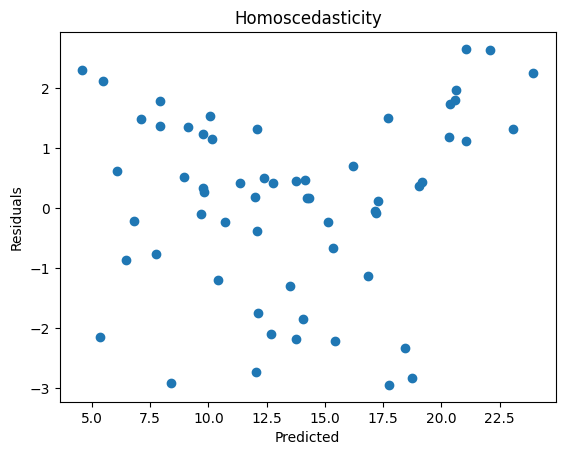

In [50]:
plt.scatter(pred_value, residuals)
plt.title('Homoscedasticity')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()        # There's no relation between residuals and predicted values means there's no biasness & the model is trained well

# 2. Normality of the Residuals

In [47]:
import seaborn as sns

<ipython-input-51-80aa74d22beb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)   # bell shaped curve is maintained near 0 means it's a normal distribution


<Axes: ylabel='Density'>

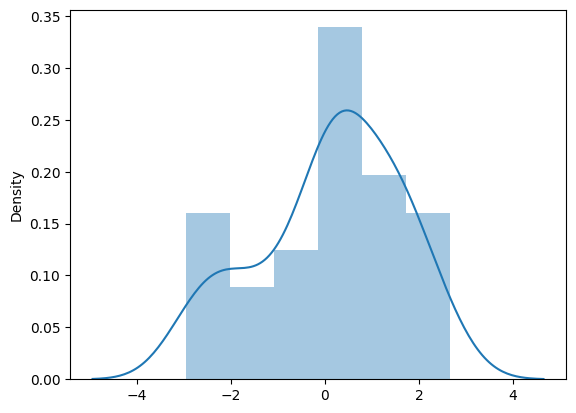

In [51]:
sns.distplot(residuals)   # bell shaped curve is maintained near 0 means it's a normal distribution

# 3. Linear Relation between input and output

In [52]:
# w1x1 + w2x2 + w3x3 + b   it's already a linear equation

# **<font color = 'green'>Ordinary Least Square (OLS) Method</font>**

In [53]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
import statsmodels.api as sm
x_with_constant = sm.add_constant(x_train)

In [57]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [59]:
model = sm.OLS(y_train, x_with_constant)

In [60]:
result = model.fit()

In [61]:
result.params    # gives exactly same values we got earlier using lr.coef_ & lr.intercept_

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [63]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.67e-63
Time:                        05:58:31   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [64]:
# R^2 value is 0.884 that is nearer to 1 which is fine

# F-Test value is 1.67 x 10^-63 which is much lesser than 0.05 which is also fine

# But in T-Test the value for Feature 3 is 0.780 which is greater than 0.05 which suggests Feature 3 isn't,
# contributing anything in the model training and it should be removed. By doing so, the cost value can be further reduced!